# Section 1: Dataset
Coffee plays an important role in my daily life. To me drinking coffee is an entire experience, right from planning which coffee drink I’ll be making, the ingredients, the process of making it to actually drinking it. But one thing that stands out to me in terms of coffee is its aroma, which I value greatly. Its smell is sharp and brings a sudden burst of freshness. I associate it with good memories from times I have spent with my friends in coffee shops. 

I have always dreamed of opening my own coffee shop and to do so I want to understand which coffee beans offer the best aromatic profile. Aroma is an important evaluation criterion as it significantly influences consumer perception and enjoyment. At the same time, sustainability is equally important to me. I have identified that one way I can be cautious about my shop’s environmental impact is by getting my beans from ethically sourced and processed producers. Coffee processing can be water-intensive and environmentally demanding, so finding high-quality beans that are produced responsibly is important to my research.

The dataset I am using contains various coffee bean characteristics and their respective quality metrics. Each row is a type of coffee, the number of bags available for it, the weight of the bags, the processing method of the beans, aroma etc. I found this dataset on Kaggle under the ‘Coffee Bean Quality Dataset’ where I downloaded it as a csv. This dataset caught my attention because it two things I care about — quality and sustainability — to identify which coffees not only smell and taste great but are also processed in ways that align with my environmental values.

In [43]:
import pandas as pd
df = pd.read_csv('beans_data.csv')
df

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,0,1,35 kg,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.00,8.58,89.33,11.8,0,0,green,3
1,1,1,80 kg,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.00,8.50,87.58,10.5,0,0,blue-green,0
2,2,19,25 kg,Java,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.00,8.33,87.42,10.4,0,0,yellowish,2
3,3,1,22 kg,Gesha,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.00,8.25,87.17,11.8,0,0,green,0
4,4,2,24 kg,Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.00,8.25,87.08,11.6,0,2,yellow-green,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1324,141,90 kg,Castillo Paraguaycito,Double Carbonic Maceration / Natural,7.83,7.08,7.67,7.00,8.25,7.67,8.67,7.83,87.08,11.6,4,1,blue-green,2
1325,1325,584,13 kg,Bourbon,Anaerobico 1000h,8.58,8.08,7.67,8.17,7.67,7.50,10.00,6.67,84.92,11.2,4,10,brownish,16
1326,1326,260,48 kg,Ethiopian Heirlooms,Washed / Wet,7.75,7.25,8.42,8.58,6.83,8.08,10.00,7.17,87.58,10.4,4,6,yellow-green,4
1327,1327,5,85 kg,Typica Gesha,Pulped natural / honey,8.58,7.42,7.67,7.92,6.83,7.08,9.33,7.83,86.92,9.4,2,7,yellow- green,0


In [44]:
column_names = df.columns.tolist()
column_names

['ID',
 'Number of Bags',
 'Bag Weight',
 'Variety',
 'Processing Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Overall',
 'Total Cup Points',
 'Moisture Percentage',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects']

In [45]:
rows_columns = df.shape
rows_columns

(1329, 19)

# Section 2: Exploratory Data Analysis
I wanted to start off by understanding my dataset. 
This included identifying the number of observations, looking at column types and checking formatting inconsistencies. Establishing this foundation would help me determine which variables require need to be changed and which could be directly used for exploration.
Since one of my analytical focuses is based on sustainability, I wanted to pay attention to columns that reflected resource use and production scale. The variable ‘Number of Bags’ indicated the volume of a given coffee variety. Higher production volumes may have a greater environmental footprint. 

Before moving forward, I made sure this variable was cleaned. I had to make sure this numeric column is stored as only floats without the kgs. 

In [46]:
#Cleaning the datset
numeric_cols = ['Number of Bags', 'Bag Weight', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Overall','Total Cup Points','Moisture Percentage','Category One Defects','Quakers','Category Two Defects']

for col in numeric_cols:
    df[col] = df[col].replace(r'[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,0,1,35,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.00,8.58,89.33,11.8,0,0,green,3
1,1,1,80,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.00,8.50,87.58,10.5,0,0,blue-green,0
2,2,19,25,Java,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.00,8.33,87.42,10.4,0,0,yellowish,2
3,3,1,22,Gesha,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.00,8.25,87.17,11.8,0,0,green,0
4,4,2,24,Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.00,8.25,87.08,11.6,0,2,yellow-green,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1324,141,90,Castillo Paraguaycito,Double Carbonic Maceration / Natural,7.83,7.08,7.67,7.00,8.25,7.67,8.67,7.83,87.08,11.6,4,1,blue-green,2
1325,1325,584,13,Bourbon,Anaerobico 1000h,8.58,8.08,7.67,8.17,7.67,7.50,10.00,6.67,84.92,11.2,4,10,brownish,16
1326,1326,260,48,Ethiopian Heirlooms,Washed / Wet,7.75,7.25,8.42,8.58,6.83,8.08,10.00,7.17,87.58,10.4,4,6,yellow-green,4
1327,1327,5,85,Typica Gesha,Pulped natural / honey,8.58,7.42,7.67,7.92,6.83,7.08,9.33,7.83,86.92,9.4,2,7,yellow- green,0


I then focused on my second priority which is using the best smelling coffee beans. Now I had to think about what classifies a coffee bean variety as best smelling? I decided to focus on the 'Aroma' variable. I looked at the Aroma scores for each coffee bean variety.

I used descriptive statistics to understand and calculate the quality and sustainability related characteristics of my dataset such as the mean aroma score, which provides a reference point, and then the beans with aroma scores above this mean point will be the varieties with the highest aroma scores and the ones I am supposed to use.

Below, the average aroma score across all coffee beans is avg_aroma. Beans with aroma above this value will be the more desirable and likely the ones I will use.

In [47]:
# average aroma score
avg_aroma = df['Aroma'].mean()
avg_aroma

np.float64(7.735884123401053)

Below, the num_above_avg tells me which coffee beans have an aroma score above the mean aroma score.

In [48]:
# number of beans with aroma above average
above_avg_aroma = df[df['Aroma'] > avg_aroma]
num_above_avg = len(above_avg_aroma)
num_above_avg

706

My analysis tells me that out of 1329, 706 values match the criteria of having an aroma score of above the mean of 7.74

Now I will focus on the sustainability angle of this project. When looking at sustainability I focused on the 'Processing Method' variable. Based on the results below, the most common processing method is Washed / Wet, followed by Pulped Natural / Honey. Washed and Wet is the most water-intensive process, so picking a less resource-intensive methods like Natural / Dry, Pulped Natural / Honey, Honey, Mosstoas would be ideal.

In [49]:
# the processing methods
processing_counts = df['Processing Method'].value_counts()
processing_counts

Processing Method
Washed / Wet                            263
Pulped natural / honey                  156
Natural / Dry                           145
Double Carbonic Maceration / Natural    139
Double Anaerobic Washed                 134
Honey,Mossto                            130
Wet Hulling                             123
Semi Washed                             121
Anaerobico 1000h                        112
SEMI-LAVADO                               1
Name: count, dtype: int64

Another variable I chose to analyse as part of the sustainability aspect is the number of bags of beans. The larger bags of beans indicate more resource use like water, which means that coffee beans produced in larger quantities could have a larger environmental footprint. 

Beans with fewer bags may be more sustainable due to smaller production scale. To do this I chose to focus on the minimum and first quartile which will give me the smaller bags which are more sustainable. The median and mean of the 'Number of Bags' variable will give me the average bags produced overall, which gives an understanding of the production intensity. The median will tell me the typical production quantity. 

Given its my first time owning a coffee shop and I want to be sustainable, the lesser bags I have it will be easier to manage and there is less waste. 

In [50]:
df['Number of Bags'].describe()


count    1329.000000
mean      185.223476
std       227.432935
min         1.000000
25%        14.000000
50%        74.000000
75%       320.000000
max      2240.000000
Name: Number of Bags, dtype: float64

From the above statistics, I saw that the mean of the bags is 185.22 and the median is 74 bags. This means that although the average number of bags is high, most coffee varieties are produced in smaller quantities. 

The first quartile and minimum value indicates that there are many small bags of coffees available. These align with my sustainability goals and something which I should focus on.

Now with all the results I wanted to figure out the beans I should consider. Just to reiterate my criteria for the ideal beans is:
- Aroma, which should be above the average aroma score of 7.74
- Sustainable processing methods- either Natural / Dry, Pulped Natural / Honey, Honey, Mossto which are least water-intensive processes
- Smaller number of bags of beans should be used for lower environmental impact 

In [51]:
top_beans = df[(df['Aroma'] > avg_aroma) & 
               (df['Processing Method'].isin(['Natural / Dry', 'Pulped Natural / Honey', 'Honey, Mossto']))]
top_beans = top_beans[top_beans['Number of Bags'] < top_beans['Number of Bags'].median()]
top_beans

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
7,7,1,90,Sl34+Gesha,Natural / Dry,8.25,8.25,8.17,8.00,7.92,8.08,10.00,8.08,86.75,10.0,0,0,yellow green,1
10,10,10,30,Ethiopian Heirlooms,Natural / Dry,8.08,8.25,8.00,8.08,7.92,7.92,10.00,8.00,86.25,11.8,0,1,greenish,1
11,11,5,15,Gesha,Natural / Dry,8.08,8.00,8.00,7.75,8.25,8.17,10.00,8.00,86.25,11.5,0,0,brownish,1
17,17,5,2,Gesha,Natural / Dry,8.00,8.17,8.00,7.92,7.92,7.92,10.00,8.17,86.08,10.3,0,0,yellow-green,0
18,18,8,1,Gesha,Natural / Dry,8.08,8.17,7.75,7.92,7.83,8.00,10.00,8.17,85.92,11.0,0,0,brownish,1
20,20,8,30,Gesha,Natural / Dry,8.00,7.92,8.08,7.92,7.75,8.00,10.00,8.08,85.75,11.6,0,0,yellowish,0
21,21,1,20,Typica,Natural / Dry,8.08,8.00,7.92,7.92,8.00,7.83,10.00,7.92,85.67,10.4,0,0,green,0
26,26,1,100,Gesha,Natural / Dry,7.92,7.92,8.00,7.92,7.83,7.92,10.00,8.00,85.50,9.1,0,0,green,2
27,27,1,90,Gesha,Natural / Dry,8.17,8.08,7.92,8.00,7.58,7.83,10.00,7.92,85.50,10.6,0,0,green,0
28,28,1,85,Gesha,Natural / Dry,8.00,8.00,8.00,7.92,7.75,7.92,10.00,7.92,85.50,10.2,0,0,blue-green,0


Now from the top beans I will look at their average aroma. This filtering will give the high-quality beans.

In [52]:
top_avg_aroma = top_beans['Aroma'].mean()
top_aroma_rows = top_beans[top_beans['Aroma'] >= top_avg_aroma]
top_aroma_rows = top_aroma_rows.sort_values(by='Aroma', ascending=False)
top_aroma_rows

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
491,491,40,36,SL28,Natural / Dry,8.58,7.42,7.67,8.08,8.17,7.25,10.00,8.58,86.17,10.2,0,7,blue-green,7
423,423,26,22,Typica,Natural / Dry,8.58,7.58,7.92,8.33,7.08,7.25,10.00,8.50,82.25,12.1,0,6,yellow green,12
863,863,40,1,SL14,Natural / Dry,8.58,7.25,7.50,8.33,7.00,6.67,10.00,7.08,87.00,13.3,1,9,yello-green,3
808,808,22,70,"Bourbon, Catimor, Caturra, Typica",Natural / Dry,8.58,8.42,6.67,8.25,7.17,8.00,8.67,7.58,84.75,9.3,4,2,pale yellow,3
1078,1078,35,20,"Caturra,Colombia,Castillo",Natural / Dry,8.50,7.42,7.58,8.33,7.25,7.08,10.00,8.33,85.25,10.1,4,1,yellow-green,4
733,733,14,100,"Jember,TIM-TIM,Ateng",Natural / Dry,8.33,6.75,8.08,7.00,8.00,7.08,8.67,7.17,84.33,9.7,0,6,yellow- green,11
7,7,1,90,Sl34+Gesha,Natural / Dry,8.25,8.25,8.17,8.00,7.92,8.08,10.00,8.08,86.75,10.0,0,0,yellow green,1
45,45,6,50,Gesha,Natural / Dry,8.17,8.08,7.83,7.67,7.67,7.75,10.00,7.83,85.00,10.1,0,0,yellow green,0
562,562,3,85,Caturra,Natural / Dry,8.17,7.42,7.50,7.75,7.17,6.67,9.33,7.58,82.42,10.6,3,2,yellowish,11
731,731,10,27,"Catimor,Catuai,Caturra,Bourbon",Natural / Dry,8.17,7.58,7.67,7.17,7.83,7.25,8.67,8.25,85.83,10.4,3,12,blue-green,4


My observations: All of the coffee beans above are have high aroma scores. They are also processed through the Natural / Dry process, which is the most environmentally friendly process. For the number of bags, there is a wide range, from 1 to 300 bags. But despite this there is a consistent high Aroma score of 8.08–8.58.

Next I wanted to filter this table to only include coffees with bags <20 to maintain sustaiblity and keep it managemable.

In [53]:
sustainable_top_beans = top_beans[
    (top_beans['Aroma'] >= top_beans['Aroma'].mean()) &
    (top_beans['Number of Bags'] < 20)
]
sustainable_top_beans

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
7,7,1,90,Sl34+Gesha,Natural / Dry,8.25,8.25,8.17,8.00,7.92,8.08,10.00,8.08,86.75,10.0,0,0,yellow green,1
10,10,10,30,Ethiopian Heirlooms,Natural / Dry,8.08,8.25,8.00,8.08,7.92,7.92,10.00,8.00,86.25,11.8,0,1,greenish,1
11,11,5,15,Gesha,Natural / Dry,8.08,8.00,8.00,7.75,8.25,8.17,10.00,8.00,86.25,11.5,0,0,brownish,1
18,18,8,1,Gesha,Natural / Dry,8.08,8.17,7.75,7.92,7.83,8.00,10.00,8.17,85.92,11.0,0,0,brownish,1
21,21,1,20,Typica,Natural / Dry,8.08,8.00,7.92,7.92,8.00,7.83,10.00,7.92,85.67,10.4,0,0,green,0
27,27,1,90,Gesha,Natural / Dry,8.17,8.08,7.92,8.00,7.58,7.83,10.00,7.92,85.50,10.6,0,0,green,0
45,45,6,50,Gesha,Natural / Dry,8.17,8.08,7.83,7.67,7.67,7.75,10.00,7.83,85.00,10.1,0,0,yellow green,0
72,72,1,20,Typica,Natural / Dry,8.08,7.92,7.75,7.83,7.50,7.58,10.00,7.83,84.50,10.2,0,0,green,0
562,562,3,85,Caturra,Natural / Dry,8.17,7.42,7.50,7.75,7.17,6.67,9.33,7.58,82.42,10.6,3,2,yellowish,11
731,731,10,27,"Catimor,Catuai,Caturra,Bourbon",Natural / Dry,8.17,7.58,7.67,7.17,7.83,7.25,8.67,8.25,85.83,10.4,3,12,blue-green,4


Then after this I will count the top beans by processing method

In [54]:
top_processing_counts = sustainable_top_beans['Processing Method'].value_counts()
top_processing_counts

Processing Method
Natural / Dry    13
Name: count, dtype: int64

# Section 3: Visualization

For the first visualition I wanted to see how small-batch coffees relate to aroma.

In [55]:
sustainable_top_beans_sorted = sustainable_top_beans.sort_values('Number of Bags')

<Axes: title={'center': 'highest scored aroma, small-batch beans'}, xlabel='number of bags', ylabel='Aroma score'>

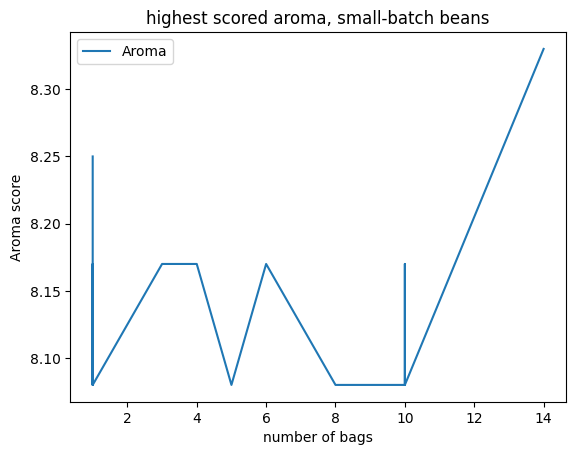

In [56]:
sustainable_top_beans_sorted.plot.line(
    x='Number of Bags',
    y='Aroma',
    title='highest scored aroma, small-batch beans',
    xlabel='number of bags',
    ylabel='Aroma score',
)

This above plot shows the relationship between the number of bags and the aroma score. The smallest batches, 1–5 bags, has some of the highest aroma scores. The overall trend shows that the sustainability-focused and low-volume coffees can keep up the flavor.

<Axes: title={'center': 'Distribution of small-batch beans production'}, xlabel='Number of bags', ylabel='count of the coffee lots'>

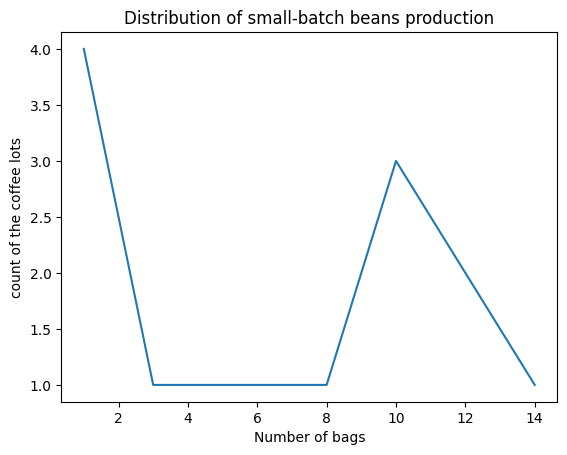

In [57]:
bag_counts = sustainable_top_beans['Number of Bags'].value_counts().sort_index()

bag_counts.plot.line(
    title='Distribution of small-batch beans production',
    xlabel='Number of bags',
    ylabel='count of the coffee lots',
)

The above shows the batch sizes for the criteria of the coffee beans . Since most coffee beans are made in batches of 1–10 bags, only a few reach slightly higher numbers. The visualization draws attention to the fact that the small-scale production, which are the (1-10 bags) dominate the this results, again emphasizing sustainability and a lower environmental footprint.

<Axes: title={'center': 'the average aroma score by the bean variety distribution'}, xlabel='coffee variety', ylabel='aroma score'>

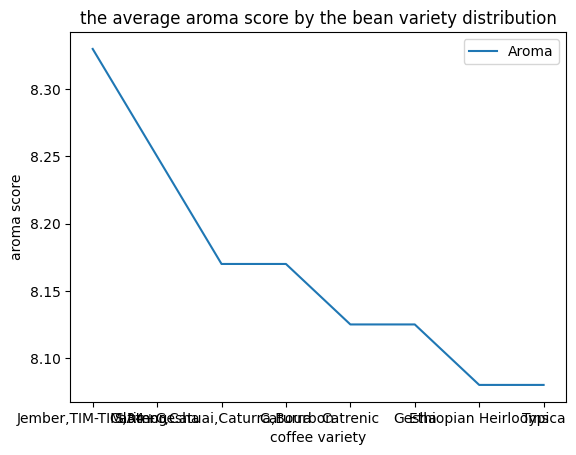

In [58]:
aroma_variety = sustainable_top_beans.groupby('Variety')['Aroma'].mean().sort_values(ascending=False)

aroma_variety.reset_index().plot.line(
    x='Variety',
    y='Aroma',
    title='the average aroma score by the bean variety distribution',
    xlabel='coffee variety',
    ylabel='aroma score'
)

This shows the average aroma scores of different the diffferent variety of beans and the other conditions placed. Certain beans like Gesha and Typica, have a high aroma score which can tell us that they are high-quality and suitable for sustainable production.

# Section 4: Planning for Part II

What I learnt from my current analysis is that small-batch coffees can achieve very high aroma scores. This shows that sustainability and quality are not mutually exclusive. I also observed that the Natural / Dry processing method dominates among these sustainable coffees. Beans like Gesha, Typica, and SL28 are the ideal ones in terms of aroma and overall scores. Also the number of bags of beans does not to compromise quality like for eg beans with only 1–5 bags are actually ranking at the top.

Going forward I want to investigate the relationship between the quality and production scale to determine whether smaller, sustainable batches consistently deliver higher sensory scores. I might add more varibles as well if there is not enough to analyse. I might also look at how the processing method could maybe impact the bean quality by looking at the charcteristics of each bean. And then I might end with examining the patterns across multiple sensory metrics to identify coffees that excel in overall quality. I am not sure which approach I will take.


# Section 5: Data Science

For the second part of my project I will be focusing on the first question mentioned above. 

**Research question:** Investigating the relationship between the aroma score and the production scale (measure by number of bags) to determine whether the smaller batches of bags deliver higher aroma scores. 

I chose this question for my data analysis because I have clear numerical variables: aroma and number of bags, which I have already explored so it's an easy continuation. Also in my project so far, I have explored the aroma score and production scale as separate variables, but to be a sustainable coffee shop owner, I need to understand if the high scoring aroma beans come from the small batch bags. This question will help me understand that if smaller number of bags show higher aroma scores, then sourcing low-volume beans will allow me to maintain the quality and reducing environmental impact.

To answer this my research question I chose to perform a hypothesis test. This is needed as my chosen question is a comparative inference question so I will need more than just descriptive plots. So by using a sample data I can test a claim that I make and whether the differences in aroma scores across the production scales and whether they are meaningful or just due to random variation.

So now for the hypothesis test I will split my filtered dataset from the end of Section 3 at the median number of bags. This will splits my sample into two equal-sized groups and compare them. Group 1 represent the low-production beans and Group 2 are the high-production beans. 

So my hypotheses are the following:

H₀ (Null): There is no difference in aroma score between low-production and high-production beans.

H₁ (Alternative): The low-production beans have a higher mean aroma score than high-production beans.

In [59]:
import scipy.stats as stats
import numpy as np

median_bags = sustainable_top_beans['Number of Bags'].median()

low_production = sustainable_top_beans[sustainable_top_beans['Number of Bags'] <= median_bags]['Aroma']
high_production = sustainable_top_beans[sustainable_top_beans['Number of Bags'] > median_bags]['Aroma']
sustainable_top_beans

,ID,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
7,7,1,90,Sl34+Gesha,Natural / Dry,8.25,8.25,8.17,8.00,7.92,8.08,10.00,8.08,86.75,10.0,0,0,yellow green,1
10,10,10,30,Ethiopian Heirlooms,Natural / Dry,8.08,8.25,8.00,8.08,7.92,7.92,10.00,8.00,86.25,11.8,0,1,greenish,1
11,11,5,15,Gesha,Natural / Dry,8.08,8.00,8.00,7.75,8.25,8.17,10.00,8.00,86.25,11.5,0,0,brownish,1
18,18,8,1,Gesha,Natural / Dry,8.08,8.17,7.75,7.92,7.83,8.00,10.00,8.17,85.92,11.0,0,0,brownish,1
21,21,1,20,Typica,Natural / Dry,8.08,8.00,7.92,7.92,8.00,7.83,10.00,7.92,85.67,10.4,0,0,green,0
27,27,1,90,Gesha,Natural / Dry,8.17,8.08,7.92,8.00,7.58,7.83,10.00,7.92,85.50,10.6,0,0,green,0
45,45,6,50,Gesha,Natural / Dry,8.17,8.08,7.83,7.67,7.67,7.75,10.00,7.83,85.00,10.1,0,0,yellow green,0
72,72,1,20,Typica,Natural / Dry,8.08,7.92,7.75,7.83,7.50,7.58,10.00,7.83,84.50,10.2,0,0,green,0
562,562,3,85,Caturra,Natural / Dry,8.17,7.42,7.50,7.75,7.17,6.67,9.33,7.58,82.42,10.6,3,2,yellowish,11
731,731,10,27,"Catimor,Catuai,Caturra,Bourbon",Natural / Dry,8.17,7.58,7.67,7.17,7.83,7.25,8.67,8.25,85.83,10.4,3,12,blue-green,4


My next step will be to do a two-sample, one tailed test as I have two groups (the low-production beans and the high-production beans) and I am testing a one directional hypothesis. I will be looking at whether the low-production beans have a higher mean aroma than high-production group

In [60]:
from scipy.stats import ttest_1samp

population_mean = np.mean(high_production)

test = ttest_1samp(low_production, population_mean, alternative="greater")
test

TtestResult(statistic=np.float64(-0.35722540859079394), pvalue=np.float64(0.6334241479002434), df=np.int64(6))

The test results showed that the test statistic = -0.357. Since it is a negative value it indicates that the mean aroma of low-production beans is slightly lower than the high-production beans which is the opposite of my alternative hypothesis. The p-value = 0.633 which is larger than 0.05. Therefore, I fail to reject the null hypothesis, as there is insignificant evidence at the 5% level to conclude that the low-production beans have a higher mean aroma score than high-production beans.

This made me realise that I am in a tough spot actually as I will now either need to priortise sustainabilty or the aroma score. 

# Section 6: A Different Data Visualization

Now I wanted to visualise my findings. I picked a bar plot as it shows the central tendency for the low- and high-production beans and an understanding of the spread of the data and whether there are extreme values that should be considered. Basically it will help me compare two groups side-by-side. 

<Axes: title={'center': 'Aroma Scores by Production Scale'}, xlabel='Production scales', ylabel='Aroma score'>

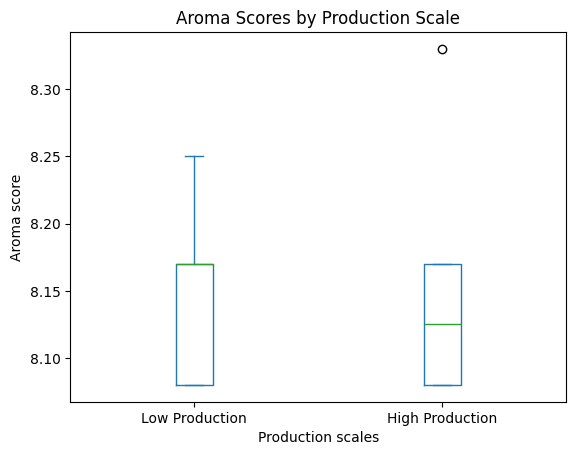

In [61]:
import pandas as pd

# I combined both the groups back into a dataframe
df_plot = pd.DataFrame({
    'Low Production': low_production,
    'High Production': high_production
})

df_plot.plot.box(title='Aroma Scores by Production Scale', xlabel='Production scales', ylabel='Aroma score')


The median for the low-production beans is higher than for high-production beans. This can help support my case that the smaller batches might have a slightly higher aroma score. Both the plots have a similar IQR, suggesting that each production scale is comparable. The whiskers of the low-production group has a  wider range, indicating that they might have more variation in aroma score. There is an outlier in the high-production box which suggests that while most of the high-production beans cluster around the median, there are some high-scoring beans even in large batches.

Overall, my takeaway from the plot is that the low-production beans have a slightly higher median aroma but the difference is small.

So while the above plot allowed me to compare the medians between the two groups, I wanted to create an additional histogram plot to see whether one production group consistently clusters at higher aroma scores. The histogram hopefully will reveal if most beans fall into high-aroma or low-aroma categories. It will show if one group had most of its values in the high range. This will help answer how the aroma values are distributed in the production groups.

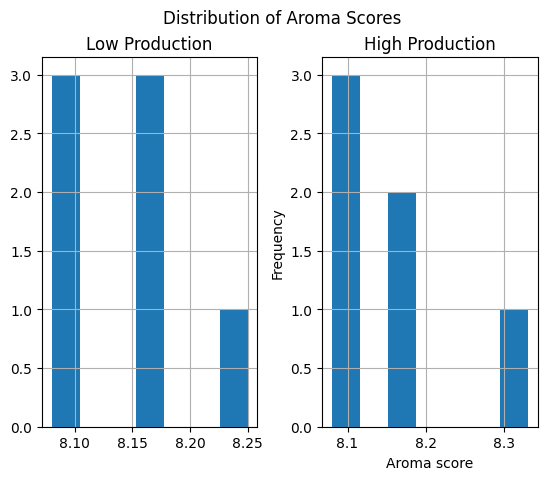

In [62]:
import matplotlib.pyplot as plt

df_plot.hist(bins=7)
plt.suptitle("Distribution of Aroma Scores")
plt.xlabel("Aroma score")
plt.ylabel("Frequency")
plt.show()

For the graph, I chose 7 bins as as my sample is small and fewer bins make the distribution easier to interpret. I can see that for the low production group has an aroma score of 8.07-8.15 and 8.17–8.25. For high production group has an aroma score of 8.07-8.11 and 8.15–8.17 and one outlier around 8.30. The low production group is a bit more consistent around the middle range of 8.07-8.15, but the high production group has more variation in the spread of the data. The variation might be because some beans in the group might have higher aroma scores. 


# Section 7: Overall Summary
In this project, I analyzed a dataset of 1,329 coffee beans. My goal was to identify coffee beans for my coffee shop that had a high aroma score and were processed sustainabily. 

To do this I focused on the aroma score, processing method, and production scale. The average aroma score across the dataset was 7.7358. I used this score(7.7358) as a threshold to find the coffee beans that have a higher aroma score than the mean. I found that 706 beans exceeded this threshold, making them strong choices for high-quality, aromatic coffees. 

For the sustainability criteria, I looked at the ‘processing methods’ and ‘number of bags’ of coffee beans variables. According to multiple online resources the coffee processing methods has significant environmental implications. The coffee processing methods mainly depends on water usage. This dataset had multiple processing methods like washed and wet and etc. They all have distinct sustainability profiles. 
When the dataset was filtered according to the highest aroma scores, I observed that Washed / Wet, Natural / Dry and Pulped Natural / Honey were the most common approaches. Out of these Washed / Wet is the most water-intensive but Natural / Dry and Pulped Natural / Honey are the most sustainable methods and featured strongly in my filtered high-aroma subset. 

The number of bags was an important variable as beans with fewer bags are more sustainable due to smaller production scale. The production scale varied widely and the median number of bags is 74 and the mean is 185.22. This descriptive statistics indicated that some beans are produced in large number of bag quantities. Focusing on the small-batched bags is more aligned with environmentally conscious sourcing.

The line plot of number of bags vs. aroma scores showed that many of the smallest batches of bags had the highest aroma scores. This suggests that small-scale production does not compromise quality. The second plot shows that the distribution of small-batch beans had batches of 1–10 bags, again reinforcing the availability of sustainable options. In terms of the beans variety, the visualization revealed that beans such as Gesha and Typica consistently had aroma scores between 8.08 and 8.58, making them the most suited, top aromatic and sustainably processed coffees.

When testing my hypothesis about if low-production beans have higher aroma scores than high-production beans, the statistical results show that t-statistic = −0.357 and p = 0.633 suggest no significant difference. On the other hand the boxplots showing that low-production beans had a slightly higher median aroma score. Thus overall my analysis demonstrates that both sustainability and quality can coexist in coffee sourcing. 
Based on all of my results, I would choose the following beans for my coffee shop:Gesha, Typica, and SL28. These are the small-batches of beans that are sustainably processed through Natural / Dry or Pulped Natural / Honey methods. They also have an average aroma score of 8.08 and 8.58 which is above the 7.74 mean score threshold. Even though my hypothesis test showed no statistically significant difference between low- and high-production aroma scores, my visualizations and descriptive data suggest that the small-batch beans can deliver top-tier aroma without large environmental impact. 
